In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms, utils
import model
import datasets
import os
import matplotlib.pyplot as plt

In [2]:
# Make sure to use the GPU. The following line is just a check to see if GPU is availables
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


6
0 torch.Size([4, 3, 224, 224])
1 torch.Size([4, 3, 224, 224])
2 torch.Size([4, 3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3 torch.Size([4, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

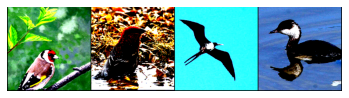

In [7]:
## load your dataset and dataloader
# feel free to change header of bird_dataset class
root = os.getcwd() + "/birds_dataset/images"
train_dataset = datasets.bird_dataset(root,'train_list.txt', transform=transforms.Compose([datasets.Rescale(256), datasets.RandomCrop(224), 
                                                                                           datasets.ToTensor(), 
                                                                                           datasets.Normalize(mean=[0.485, 0.456, 0.406],
                                                                                                              std=[0.229, 0.224, 0.225])]))
test_dataset = datasets.bird_dataset(root,'test_list.txt', transform=transforms.Compose([datasets.Rescale(256), datasets.RandomCrop(224), 
                                                                                           datasets.ToTensor(), 
                                                                                           datasets.Normalize(mean=[0.485, 0.456, 0.406],
                                                                                                              std=[0.229, 0.224, 0.225])]))
BATCH_SIZE = 4


print(train_dataset.targets)

fig = plt.figure()

# for i in range(len(train_dataset)):
#     sample = train_dataset[i]
    
#     print(i, sample['image'].shape, sample['label'])
    
#     ax = plt.subplot(2, 2, i + 1)
#     plt.tight_layout()
#     ax.set_title('Sample #{} with label {}'.format(i, sample['label']))
#     ax.axis('off')
#     plt.imshow(sample['image'].permute(1, 2, 0))

# Fill in optional arguments to the dataloader as you need it
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
test_dataloader = DataLoader(test_dataset)

for i_batch, sample_batched in enumerate(train_dataloader):
    print(i_batch, sample_batched['image'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        grid = utils.make_grid(sample_batched['image'])
        plt.figure()
        plt.imshow(grid.numpy().transpose((1, 2, 0)))
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

In [ ]:
# Create NN model object
nn_model = model.baseline_Net(classes = 20)
nn_model.to(device)


In [ ]:
# Create loss functions, optimizers
# For baseline model use this
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(nn_model.parameters(), lr=1e-4)
# Initialize weights


In [ ]:
# train your model
# For each epoch iterate over your dataloaders/datasets, pass it to your NN model, get output, calculate loss and
# backpropagate using optimizer


In [ ]:
# Save your model/best model